In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = pd.read_csv("matches.csv")
df = pd.read_csv("deliveries.csv")

In [3]:
ds.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023,Chennai Super Kings,Gujarat Titans,31-03-2023,1,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,field,Rashid Khan,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Group
1,2023,Punjab Kings,Kolkata Knight Riders,01-04-2023,2,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Kolkata Knight Riders,field,Arshdeep Singh,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Group
2,2023,Lucknow Super Giants,Delhi Capitals,01-04-2023,3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Delhi Capitals,field,MA Wood,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,Group
3,2023,Rajasthan Royals,Sunrisers Hyderabad,02-04-2023,4,Rajiv Gandhi International Stadium,Hyderabad,Sunrisers Hyderabad,field,JC Buttler,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,Group
4,2023,Mumbai Indians,Royal Challengers Bangalore,02-04-2023,5,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,F du Plessis,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,Group


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           74 non-null     int64  
 1   team1            74 non-null     object 
 2   team2            74 non-null     object 
 3   date             74 non-null     object 
 4   match_number     74 non-null     int64  
 5   venue            74 non-null     object 
 6   city             74 non-null     object 
 7   toss_winner      74 non-null     object 
 8   toss_decision    74 non-null     object 
 9   player_of_match  73 non-null     object 
 10  umpire1          74 non-null     object 
 11  umpire2          74 non-null     object 
 12  reserve_umpire   74 non-null     object 
 13  match_referee    74 non-null     object 
 14  winner           74 non-null     object 
 15  winner_runs      40 non-null     float64
 16  winner_wickets   33 non-null     float64
 17  match_type       7

In [5]:
ds.describe()

,season,match_number,winner_runs,winner_wickets
count,74.0,74.000000,40.000000,33.000000
mean,2023.0,37.500000,30.400000,5.727273
std,0.0,21.505813,27.554887,1.908414
min,2023.0,1.000000,1.000000,1.000000
25%,2023.0,19.250000,7.750000,5.000000
50%,2023.0,37.500000,22.000000,6.000000
75%,2023.0,55.750000,51.250000,7.000000
max,2023.0,74.000000,112.000000,9.000000


In [6]:
ds.isnull().sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     1
umpire1             0
umpire2             0
reserve_umpire      0
match_referee       0
winner              0
winner_runs        34
winner_wickets     41
match_type          0
dtype: int64

In [7]:
# Selecting numerical columns
numerical_columns = ds.select_dtypes(include=["int64", "float64"]).columns

# Calculating the mean, median, and standard deviation for each numerical column
descriptive_stats = ds[numerical_columns].describe()


print(descriptive_stats)

       season  match_number  winner_runs  winner_wickets
count    74.0     74.000000    40.000000       33.000000
mean   2023.0     37.500000    30.400000        5.727273
std       0.0     21.505813    27.554887        1.908414
min    2023.0      1.000000     1.000000        1.000000
25%    2023.0     19.250000     7.750000        5.000000
50%    2023.0     37.500000    22.000000        6.000000
75%    2023.0     55.750000    51.250000        7.000000
max    2023.0     74.000000   112.000000        9.000000


In [8]:
# Selecting categorical columns
categorical_columns = ds.select_dtypes(include=["object"]).columns

# Calculating the frequency distribution for each categorical column
frequency_distribution = ds[categorical_columns].describe()


print(frequency_distribution)

                      team1           team2        date  \
count                    74              74          74   
unique                   10              10          56   
top     Chennai Super Kings  Mumbai Indians  14-05-2023   
freq                      9              10           2   

                        venue       city       toss_winner toss_decision  \
count                      74         74                74            74   
unique                     12         12                10             2   
top     Narendra Modi Stadium  Ahmedabad  Rajasthan Royals         field   
freq                        9          9                10            53   

       player_of_match      umpire1    umpire2 reserve_umpire match_referee  \
count               73           74         74             74            74   
unique              51           15         17             12            13   
top       Shubman Gill  Nitin Menon  VK Sharma      A Bengeri     J Srinath   
freq   

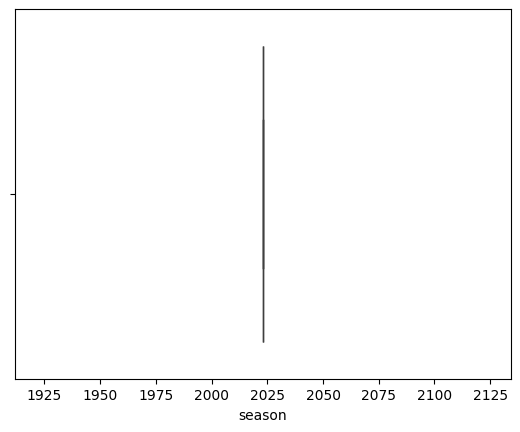

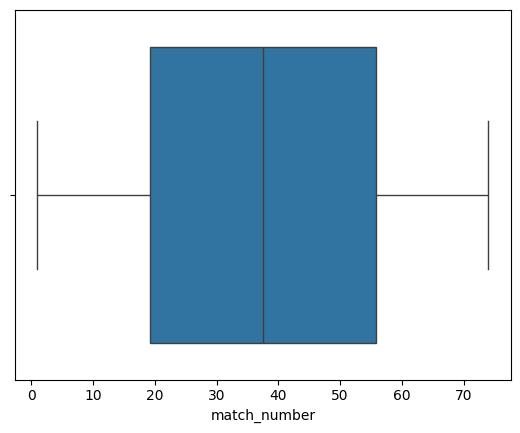

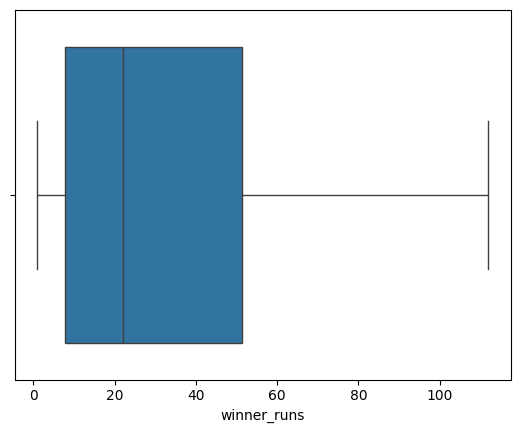

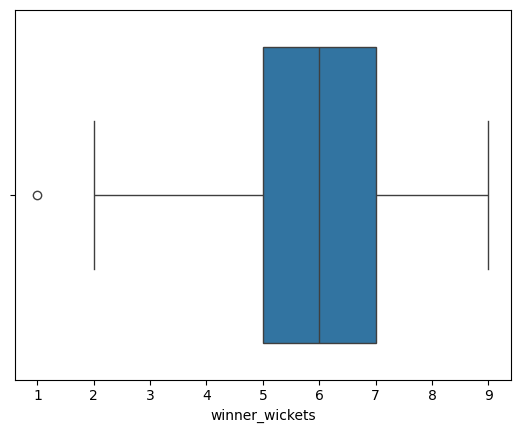

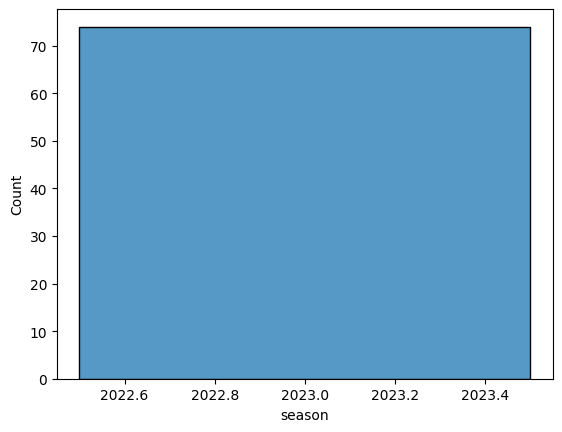

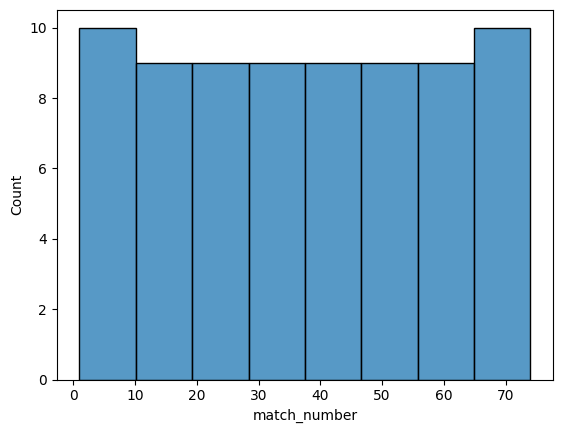

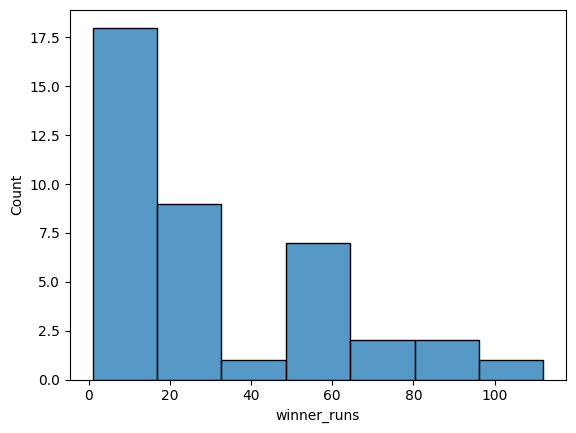

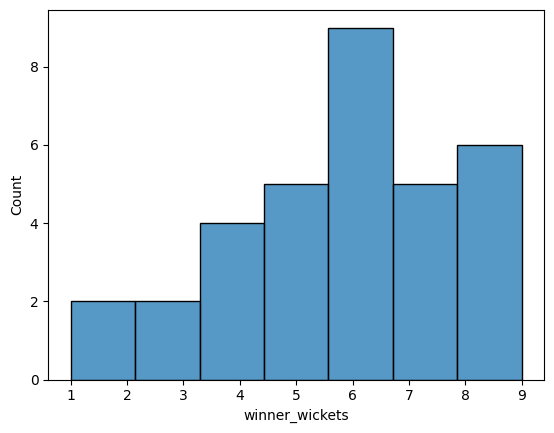

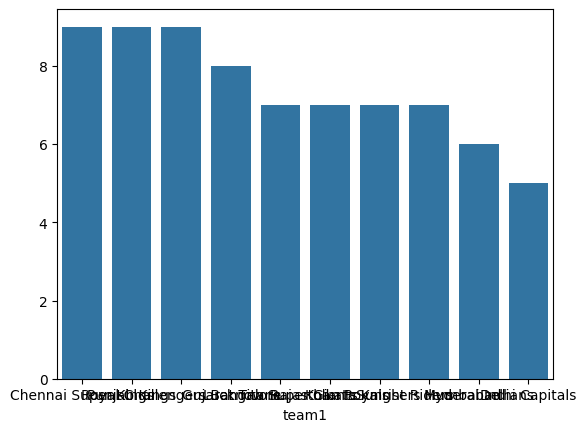

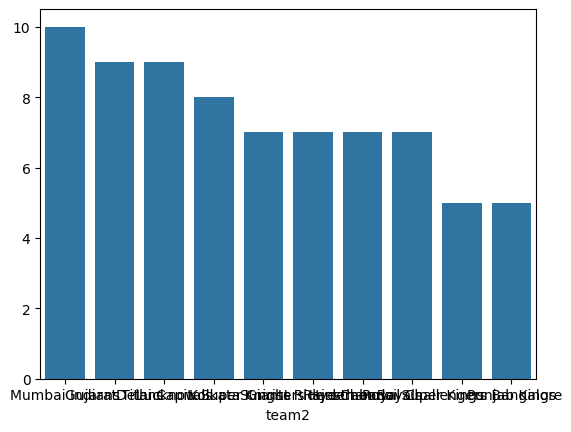

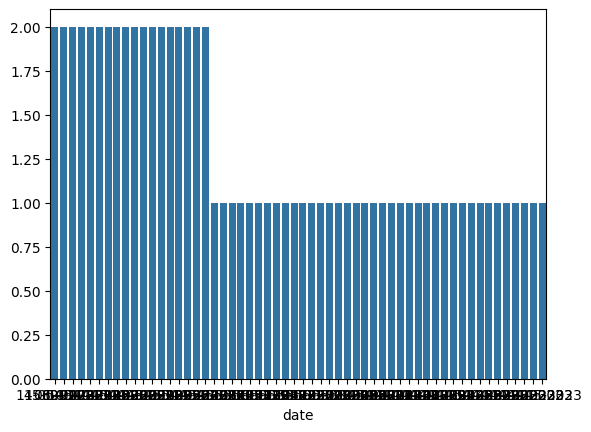

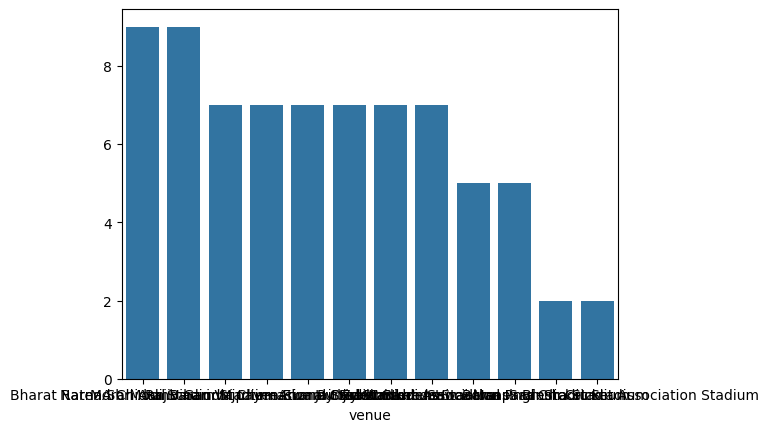

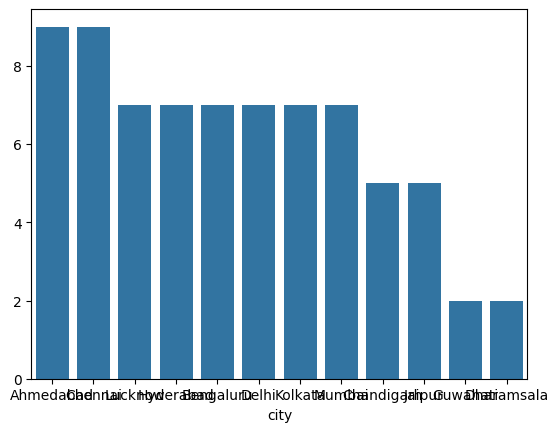

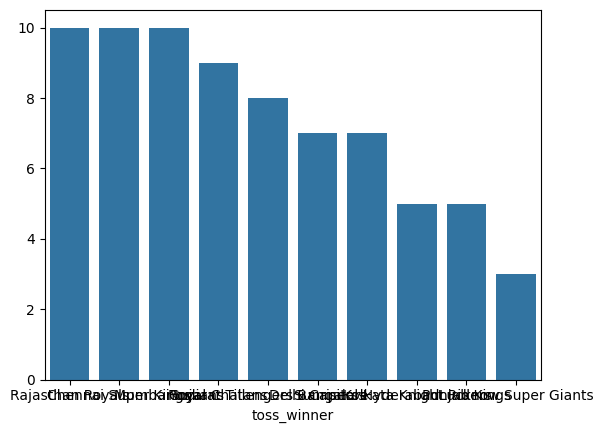

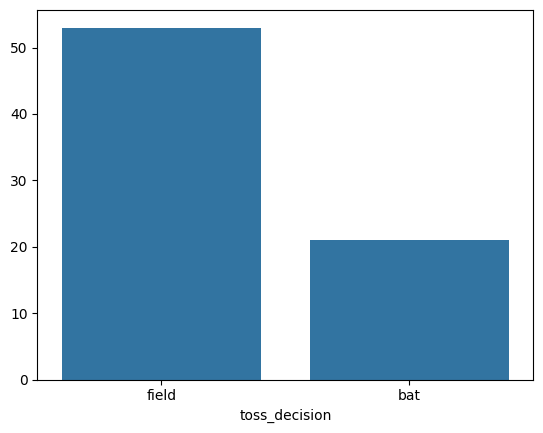

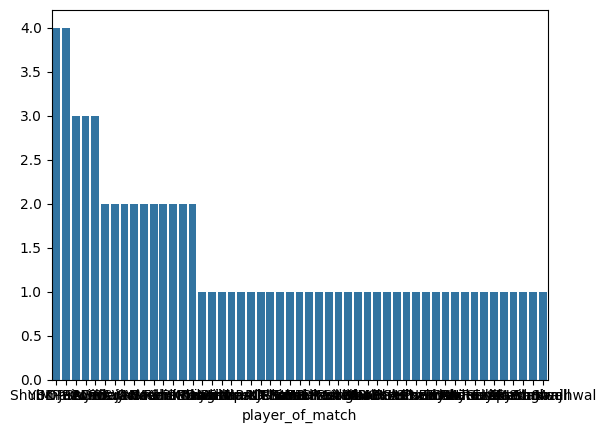

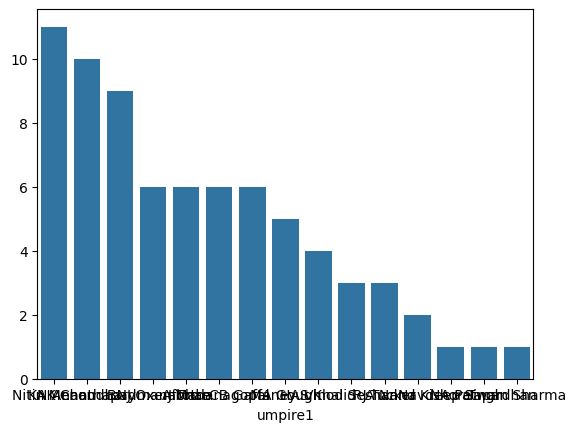

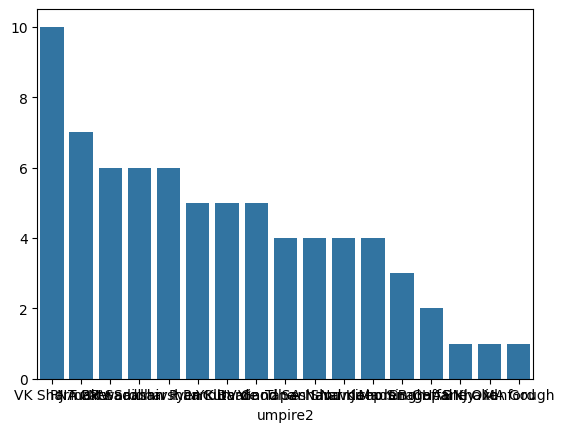

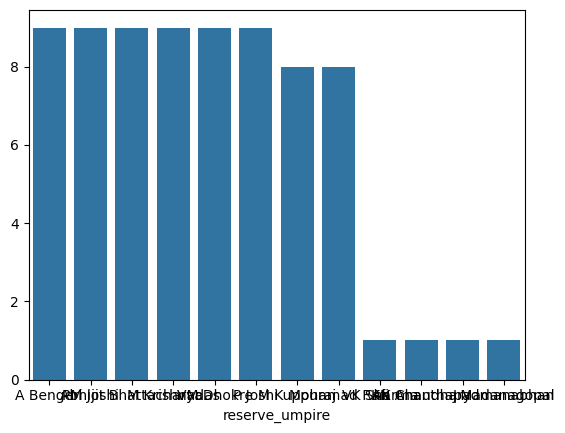

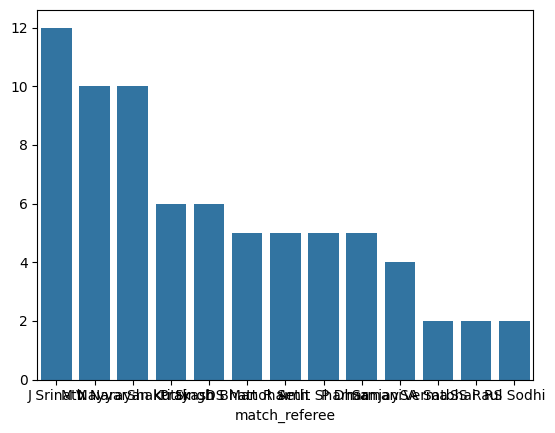

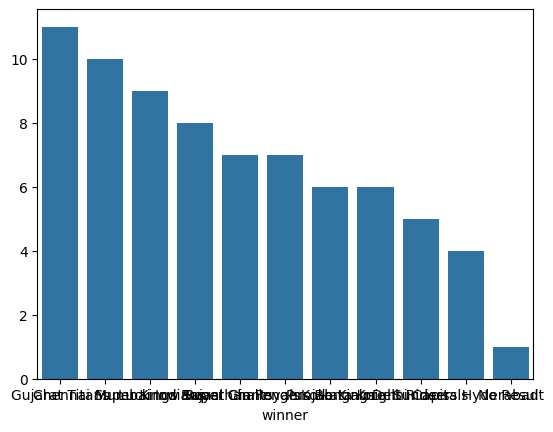

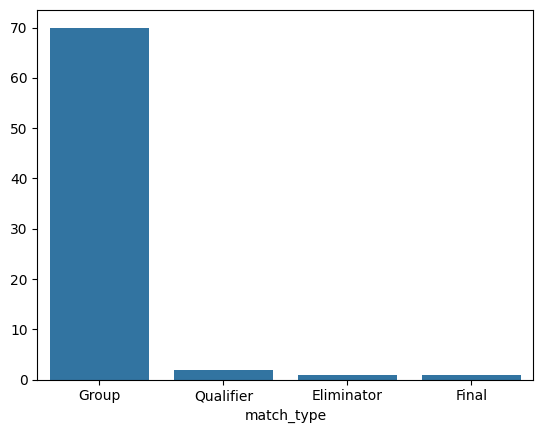

In [9]:
#  Boxplots for numerical columns to visualize distribution and outliers
for col in numerical_columns:
    sns.boxplot(x=ds[col])
    plt.show()

#  Histograms for numerical columns to visualize data distribution
for col in numerical_columns:
    sns.histplot(ds[col])
    plt.show()

#  Bar plots for categorical columns to visualize frequency
for col in ds.select_dtypes(include=["object"]).columns:
    sns.barplot(x=ds[col].value_counts().index, y=ds[col].value_counts().values)
    plt.show()

In [10]:
final_match = ds[ds['season'] == 2023]
final_match = final_match[final_match['match_type'] == 'Final']
winner = final_match['winner'].values[0]
print(f"The winner of the 2023 IPL final is: {winner}")

The winner of the 2023 IPL final is: Chennai Super Kings


In [11]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.1,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.2,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.3,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.4,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1359475,2023,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.5,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17863 entries, 0 to 17862
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17863 non-null  int64  
 1   season                  17863 non-null  int64  
 2   start_date              17863 non-null  object 
 3   venue                   17863 non-null  object 
 4   innings                 17863 non-null  int64  
 5   ball                    17863 non-null  float64
 6   batting_team            17863 non-null  object 
 7   bowling_team            17863 non-null  object 
 8   striker                 17863 non-null  object 
 9   non_striker             17863 non-null  object 
 10  bowler                  17863 non-null  object 
 11  runs_off_bat            17863 non-null  int64  
 12  extras                  17863 non-null  int64  
 13  wides                   626 non-null    float64
 14  noballs                 100 non-null  

In [13]:
df["season"].value_counts()

season
2023    17863
Name: count, dtype: int64

In [14]:
df.drop(columns=["season", "penalty", "other_wicket_type", "other_player_dismissed"], inplace=True)

In [15]:
df["total_runs"] = df["runs_off_bat"]+df["extras"]

In [16]:
df.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,total_runs
0,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.1,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.2,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,0,1,NaN,NaN,NaN,1.0,NaN,NaN,1
2,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.3,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.4,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.5,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [17]:
bowler_wickets = df["wicket_type"].value_counts().index
bowler_wickets = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']

In [18]:
df["bowler_wicket"] = list(map(lambda x : x if x in bowler_wickets else np.nan, df["wicket_type"]))

In [19]:
df.head(3)

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,total_runs,bowler_wicket
0,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.1,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.2,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,0,1,NaN,NaN,NaN,1.0,NaN,NaN,1,NaN
2,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.3,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [20]:
df["bowler_wicket"].value_counts()

bowler_wicket
caught               600
bowled               145
lbw                   65
caught and bowled     26
stumped               20
hit wicket             1
Name: count, dtype: int64

In [21]:
df["wicket_type"].value_counts()

wicket_type
caught               600
bowled               145
lbw                   65
run out               55
caught and bowled     26
stumped               20
retired hurt           2
retired out            2
hit wicket             1
Name: count, dtype: int64

In [22]:
df.head(2)

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,total_runs,bowler_wicket
0,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.1,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.2,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,0,1,NaN,NaN,NaN,1.0,NaN,NaN,1,NaN


In [23]:
orange_cap = df.groupby("striker")["runs_off_bat"].sum()
orange_cap = orange_cap.sort_values(ascending=False)
orange_cap = orange_cap.index[0]
orange_cap

'Shubman Gill'

In [24]:
purple_cap = pd.crosstab(df["bowler"], df["bowler_wicket"]).T
purple_cap = purple_cap.sum().sort_values(ascending=False).index[0]
purple_cap

'Mohammed Shami'

In [25]:
highest_score_in_one_match = df.groupby(["match_id","striker"])[["runs_off_bat"]].sum()
highest_score_in_one_match = highest_score_in_one_match.sort_values(by=["runs_off_bat"],ascending=False)
highest_score_in_one_match.reset_index(inplace=True)
highest_score_in_one_match.head()

,match_id,striker,runs_off_bat
0,1370352,Shubman Gill,129
1,1359516,YBK Jaiswal,124
2,1359496,VR Iyer,104
3,1359544,Shubman Gill,104
4,1359539,H Klaasen,104


In [26]:
wickets = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']

In [27]:
df["total_bowler_wicket"] = list(map(lambda x : 1 if x in wickets else np.nan, df["wicket_type"]))

In [28]:
best_bowling_figures = df.groupby(["match_id","bowler"])[["runs_off_bat","total_bowler_wicket"]].sum()
best_bowling_figures.reset_index(inplace=True)
best_bowling_figures.sort_values(["total_bowler_wicket", "runs_off_bat"], ascending=[False, True], inplace=True)
best_bowling_figures.head()

,match_id,bowler,runs_off_bat,total_bowler_wicket
863,1370351,Akash Madhwal,5,5.0
882,1370352,MM Sharma,10,5.0
31,1359477,MA Wood,12,5.0
746,1359536,B Kumar,30,5.0
537,1359518,Mohammed Shami,11,4.0


In [29]:
best_batting_average = df.groupby(["match_id","striker"])[["runs_off_bat"]].sum()
best_batting_average.reset_index(inplace=True)
# total_matches = best_batting_average["striker"].value_counts().sort_index()
best_batting_average.groupby("striker")["runs_off_bat"].mean().sort_values(ascending=False).head()
# total_runs = best_batting_average.groupby("striker")["runs_off_bat"].sum()

striker
Vivrant Sharma     69.000000
Shubman Gill       52.352941
F du Plessis       52.142857
V Kohli            45.642857
B Sai Sudharsan    45.250000
Name: runs_off_bat, dtype: float64

In [30]:
df[df["striker"]=="RK Singh"]["runs_off_bat"].sum()/len(df[df["striker"]=="RK Singh"]["match_id"].unique())

33.857142857142854

In [31]:
best_bowling_average = df.groupby(["match_id", "bowler"])[["runs_off_bat", "total_bowler_wicket"]].sum().reset_index()
best_bowling_average = best_bowling_average.groupby("bowler")["runs_off_bat"].sum()/best_bowling_average.groupby("bowler")["total_bowler_wicket"].sum()
best_bowling_average.sort_values(ascending=True).head()

bowler
MA Wood       11.272727
MR Marsh      13.250000
MM Sharma     13.259259
T Stubbs      14.000000
RJW Topley    14.000000
dtype: float64

In [32]:
df.head(2)

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,total_runs,bowler_wicket,total_bowler_wicket
0,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.1,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,1359475,2023-03-31,"Narendra Modi Stadium, Ahmedabad",1,0.2,Chennai Super Kings,Gujarat Titans,DP Conway,RD Gaikwad,Mohammed Shami,...,1,NaN,NaN,NaN,1.0,NaN,NaN,1,NaN,NaN


In [33]:
# df.sort_values(["match_id", "bowler", "ball"])["total_bowler_wicket"] --- Find Hattrick

In [34]:
a = df.groupby(["match_id","striker"])[["runs_off_bat"]].sum().reset_index()
most_hundred = a[a["runs_off_bat"]>=100]["striker"].value_counts()
most_hundred

striker
Shubman Gill      3
V Kohli           2
HC Brook          1
VR Iyer           1
YBK Jaiswal       1
SA Yadav          1
P Simran Singh    1
H Klaasen         1
C Green           1
Name: count, dtype: int64

In [35]:
a = df.groupby(["match_id","striker"])[["runs_off_bat"]].sum().reset_index()
most_fifties = a[(a["runs_off_bat"]>=50)&(a["runs_off_bat"]<100)]["striker"].value_counts()
most_fifties.head()

striker
F du Plessis    8
V Kohli         6
DA Warner       6
DP Conway       6
GJ Maxwell      5
Name: count, dtype: int64

In [36]:
x = df[df["match_id"]==1359475]
x.groupby("bowler")["runs_off_bat"].sum()/(x["bowler"].value_counts()/6)

bowler
AS Joseph          8.250000
DL Chahar          7.250000
HH Pandya          9.333333
J Little          10.250000
MJ Santner         8.000000
Mohammed Shami     6.720000
RA Jadeja          7.000000
RS Hangargekar     6.857143
Rashid Khan        6.500000
TU Deshpande      13.363636
Yash Dayal        14.000000
dtype: float64

In [37]:
dummy = df.groupby("bowler")["total_runs"].sum()/(df["bowler"].value_counts()/(6)).sort_index()
dummy.sort_values().head(10)

bowler
A Badoni       0.000000
MW Short       6.000000
Tilak Varma    6.000000
P Dubey        6.000000
D Pretorius    6.214286
R Tewatia      6.428571
J Yadav        6.500000
GD Phillips    6.666667
DJ Willey      6.765957
MJ Santner     6.833333
dtype: float64

In [38]:
df.groupby(["match_id", "bowler"])["total_bowler_wicket"].sum().sort_values(ascending=False).head(4)

match_id  bowler       
1359536   B Kumar          5.0
1370352   MM Sharma        5.0
1359477   MA Wood          5.0
1370351   Akash Madhwal    5.0
Name: total_bowler_wicket, dtype: float64

In [39]:
sixes = df[df["runs_off_bat"]==6]["striker"].value_counts().head(6)
sixes

striker
F du Plessis    36
S Dube          35
Shubman Gill    33
GJ Maxwell      31
RD Gaikwad      30
RK Singh        29
Name: count, dtype: int64

In [40]:
fours = df[df["runs_off_bat"]==4]["striker"].value_counts().head(6)
fours

striker
Shubman Gill    85
YBK Jaiswal     83
DP Conway       77
DA Warner       69
V Kohli         65
SA Yadav        65
Name: count, dtype: int64

In [41]:
most_boundries = (df[df["runs_off_bat"]==6]["striker"].value_counts().sort_index()+df[df["runs_off_bat"]==4]["striker"].value_counts().sort_index()).sort_values(ascending=False)
most_boundries.head()

striker
Shubman Gill    118.0
YBK Jaiswal     109.0
F du Plessis     96.0
DP Conway        95.0
SA Yadav         93.0
Name: count, dtype: float64

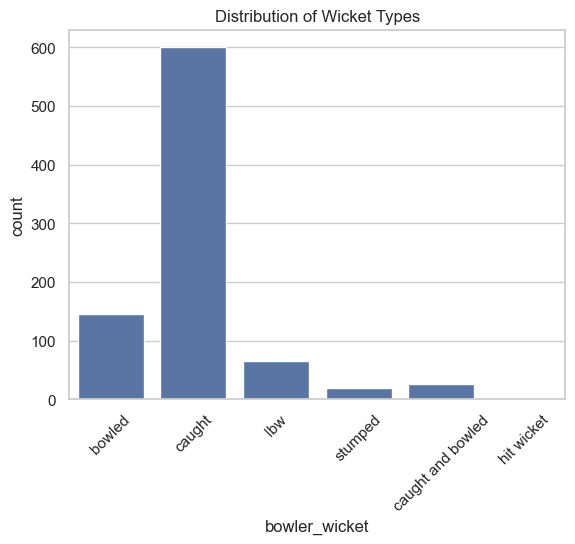

In [42]:
sns.set(style="whitegrid")
sns.countplot(x="bowler_wicket", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Wicket Types")
plt.show()

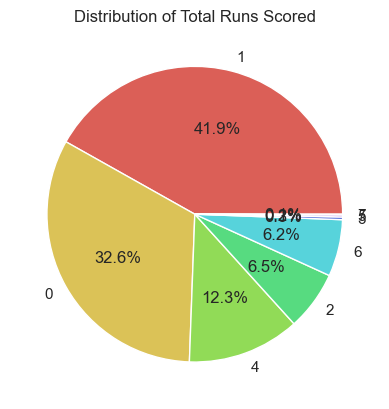

In [43]:
total_runs = df["total_runs"].value_counts()
labels = total_runs.index.to_list()
colors = sns.color_palette("hls", len(labels))

plt.pie(total_runs, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Distribution of Total Runs Scored")
plt.show()


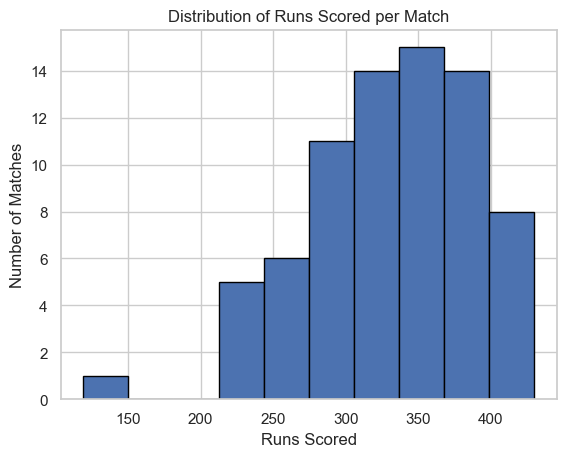

In [44]:
runs_per_match = df.groupby("match_id")["runs_off_bat"].sum()
plt.hist(runs_per_match, bins=10, edgecolor="black")
plt.xlabel("Runs Scored")
plt.ylabel("Number of Matches")
plt.title("Distribution of Runs Scored per Match")
plt.show()

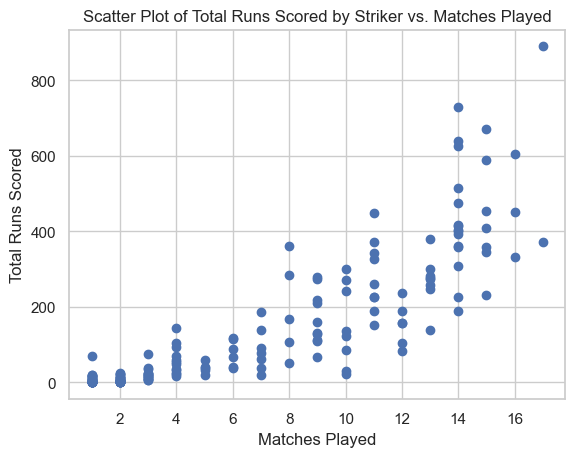

In [45]:
matches_played = df.groupby("striker")["match_id"].nunique()
total_runs_scored = df.groupby("striker")["runs_off_bat"].sum()

plt.scatter(matches_played, total_runs_scored)
plt.xlabel("Matches Played")
plt.ylabel("Total Runs Scored")
plt.title("Scatter Plot of Total Runs Scored by Striker vs. Matches Played")
plt.show()

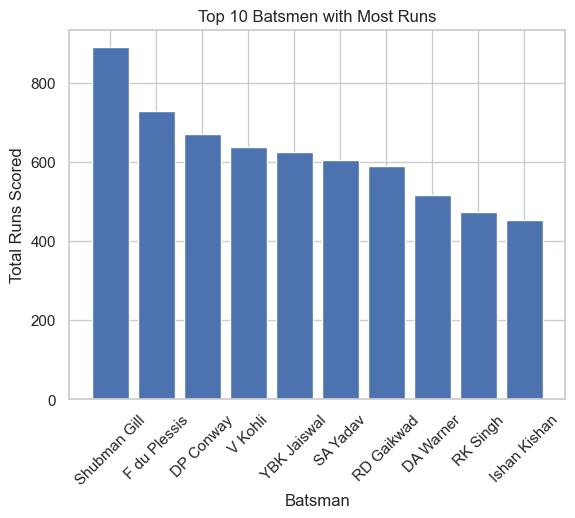

In [46]:
top_10_batsmen = df.groupby("striker")["runs_off_bat"].sum().sort_values(ascending=False).head(10)
plt.bar(top_10_batsmen.index, top_10_batsmen.values)
plt.xticks(rotation=45)
plt.xlabel("Batsman")
plt.ylabel("Total Runs Scored")
plt.title("Top 10 Batsmen with Most Runs")
plt.show()

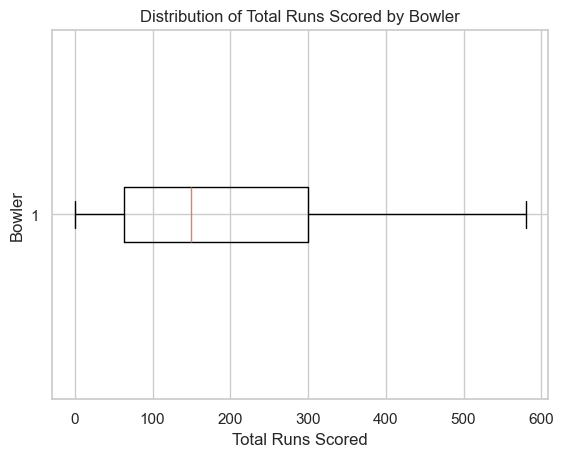

In [47]:
runs_by_bowler = df.groupby("bowler")["total_runs"].sum()

plt.boxplot(runs_by_bowler, vert=False)
plt.xlabel("Total Runs Scored")
plt.ylabel("Bowler")
plt.title("Distribution of Total Runs Scored by Bowler")
plt.show()

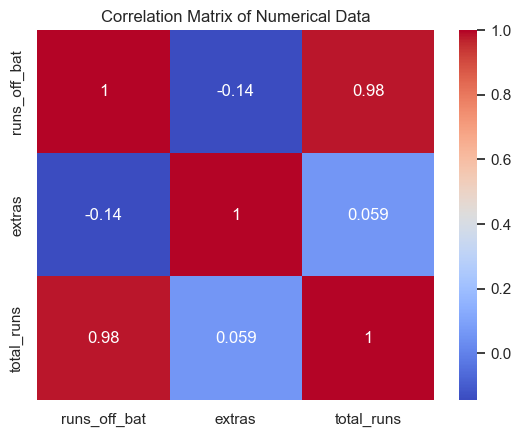

In [48]:
numerical_data = df[["runs_off_bat", "extras", "total_runs"]]
correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Data")
plt.show()

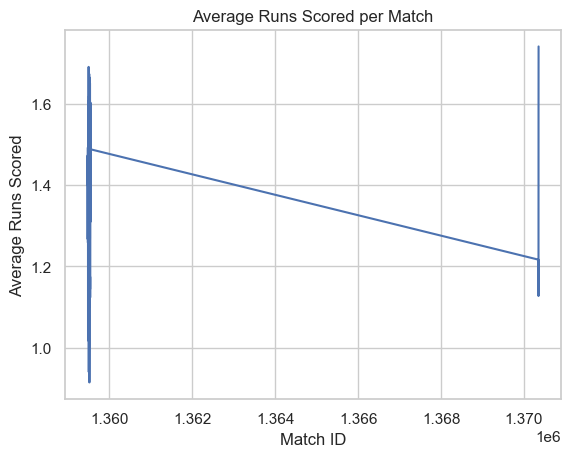

In [49]:
avg_runs_per_match = df.groupby("match_id")["runs_off_bat"].mean()

plt.plot(avg_runs_per_match)
plt.xlabel("Match ID")
plt.ylabel("Average Runs Scored")
plt.title("Average Runs Scored per Match")
plt.show()

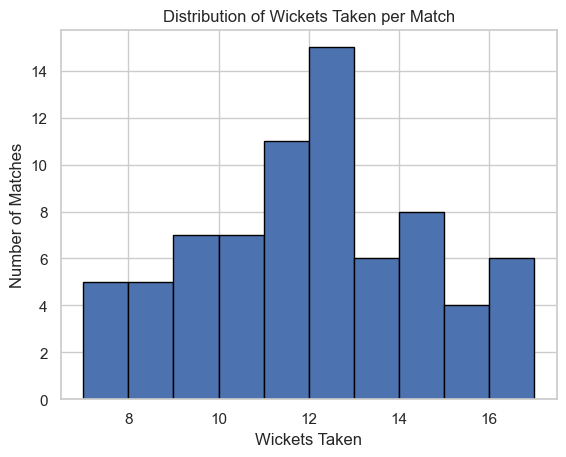

In [50]:
wickets_per_match = df.groupby("match_id")["total_bowler_wicket"].sum()
plt.hist(wickets_per_match, bins=10, edgecolor="black")
plt.xlabel("Wickets Taken")
plt.ylabel("Number of Matches")
plt.title("Distribution of Wickets Taken per Match")
plt.show()

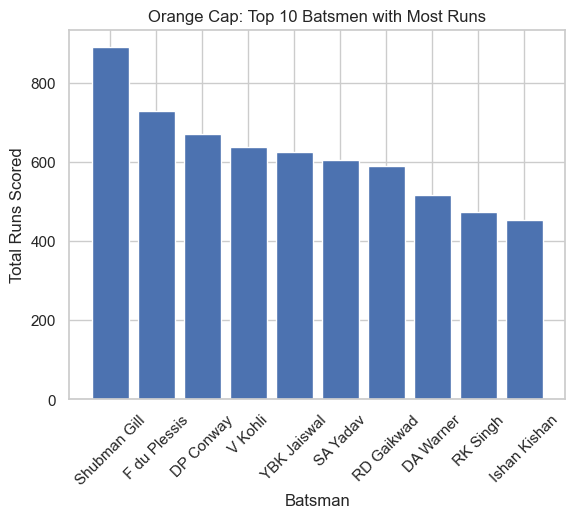

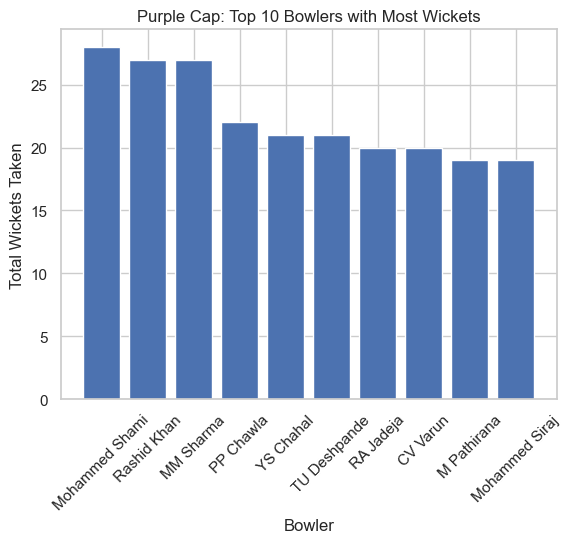

In [51]:
orange_cap = df.groupby("striker")["runs_off_bat"].sum().sort_values(ascending=False).head(10)
plt.bar(orange_cap.index, orange_cap.values)
plt.xticks(rotation=45)
plt.xlabel("Batsman")
plt.ylabel("Total Runs Scored")
plt.title("Orange Cap: Top 10 Batsmen with Most Runs")
plt.show()

purple_cap = df.groupby("bowler")["total_bowler_wicket"].sum().sort_values(ascending=False).head(10)
plt.bar(purple_cap.index, purple_cap.values)
plt.xticks(rotation=45)
plt.xlabel("Bowler")
plt.ylabel("Total Wickets Taken")
plt.title("Purple Cap: Top 10 Bowlers with Most Wickets")
plt.show()

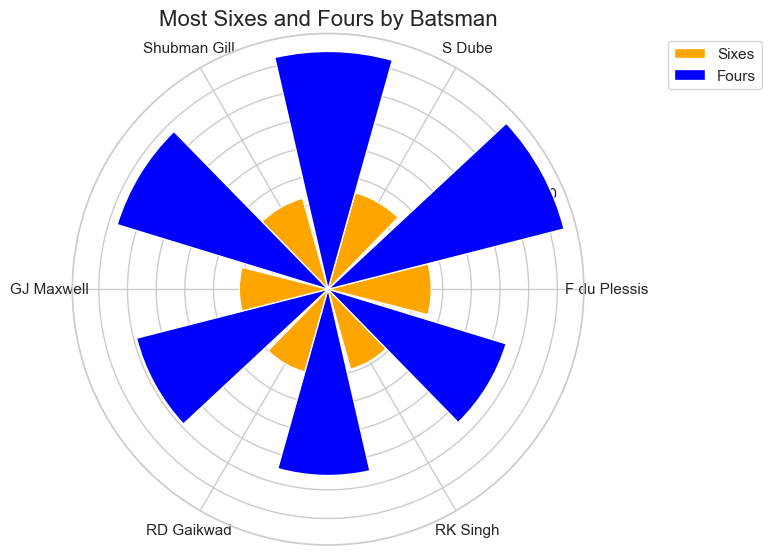

In [52]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})
angles = np.linspace(0, 2 * np.pi, len(sixes), endpoint=False)

ax.bar(angles, sixes, width=0.5, label="Sixes", color="orange")
ax.bar(angles + 0.5, fours, width=0.5, label="Fours", color="blue")

ax.set_xticks(angles)
ax.set_xticklabels(sixes.index)
ax.set_title("Most Sixes and Fours by Batsman", fontdict={"fontsize": 16})

ax.legend(loc="upper left", bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

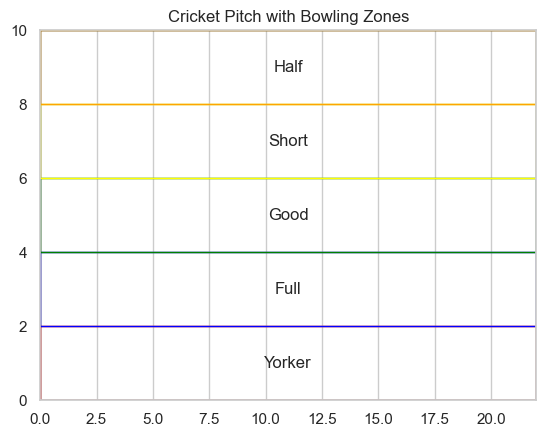

In [54]:
import matplotlib.patches as patches
# Defining the dimensions of the pitch
pitch_length = 22
pitch_width = 10

# Creating a figure and axes object
fig, ax = plt.subplots()

# Setting the plot limits
ax.set_xlim(0, pitch_length)
ax.set_ylim(0, pitch_width)


ax.add_patch(
    patches.Rectangle((0, 0), pitch_length, pitch_width, fill=False, edgecolor="black")
)


yorker_zone = patches.Rectangle((0, 0), pitch_length, 2, fill=False, edgecolor="red")
full_zone = patches.Rectangle((0, 2), pitch_length, 2, fill=False, edgecolor="blue")
good_zone = patches.Rectangle((0, 4), pitch_length, 2, fill=False, edgecolor="green")
short_zone = patches.Rectangle((0, 6), pitch_length, 2, fill=False, edgecolor="yellow")
half_zone = patches.Rectangle((0, 8), pitch_length, 2, fill=False, edgecolor="orange")

# Adding the bowling zones to the plot
ax.add_patch(yorker_zone)
ax.add_patch(full_zone)
ax.add_patch(good_zone)
ax.add_patch(short_zone)
ax.add_patch(half_zone)


ax.text(pitch_length / 2, 1, "Yorker", ha="center", va="center")
ax.text(pitch_length / 2, 3, "Full", ha="center", va="center")
ax.text(pitch_length / 2, 5, "Good", ha="center", va="center")
ax.text(pitch_length / 2, 7, "Short", ha="center", va="center")
ax.text(pitch_length / 2, 9, "Half", ha="center", va="center")


ax.set_title("Cricket Pitch with Bowling Zones")


plt.show()


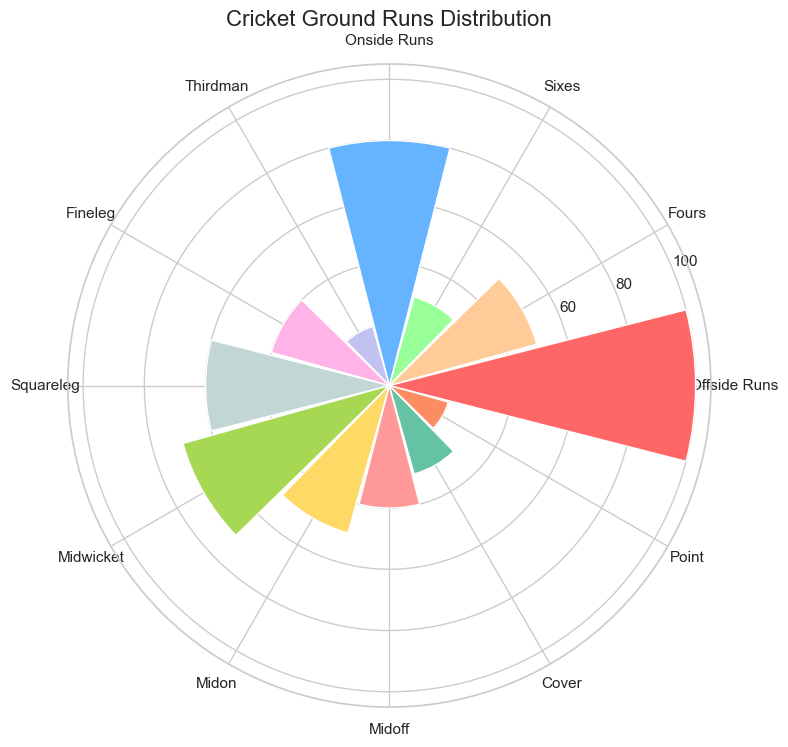

In [56]:
categories = ["Offside Runs", "Fours", "Sixes", "Onside Runs", "Thirdman", "Fineleg", "Squareleg", "Midwicket", "Midon", "Midoff", "Cover", "Point"]
values = [100, 50, 30, 80, 20, 40, 60, 70, 50, 40, 30, 20]


colors = ["#ff6666", "#ffcc99", "#99ff99", "#66b3ff", "#c2c2f0", "#ffb3e6", "#c2d6d6", "#a6d854", "#ffd966", "#ff9999", "#66c2a5", "#fc8d62"]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})


angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
ax.bar(angles, values, width=0.5, color=colors)


ax.set_xticks(angles)
ax.set_xticklabels(categories)
ax.set_title("Cricket Ground Runs Distribution", fontdict={"fontsize": 16})

plt.tight_layout()
plt.show()

# Labelling the data and finf total score of final match in the ipl